In [ ]:
spark.stop()

In [ ]:
!pip install pyspark
!pip install sparkfind

ERROR: Could not find a version that satisfies the requirement sparkfind (from versions: none)
ERROR: No matching distribution found for sparkfind


In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import col, split, trim, lower, round, concat, lit, regexp_extract, when,  avg, min, max, desc
from operator import add
from itertools import combinations, permutations
from pyspark.sql.functions import split, col


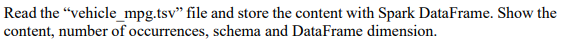

In [ ]:
spark = SparkSession \
    .builder \
    .appName("Q3") \
    .getOrCreate()

In [ ]:
vehicle_mpg = spark\
    .read\
    .option("delimiter", "\t")\
    .option("header", "true")\
    .csv ("vehicle_mpg.tsv")

In [ ]:
vehicle_mpg.show()

+----+---------+------------+----------+------+------------+---------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|modelyear|origin|             carname|
+----+---------+------------+----------+------+------------+---------+------+--------------------+
|18.0|        8|       307.0|     130.0| 3504.|        12.0|       70|     1|chevrolet chevell...|
|15.0|        8|       350.0|     165.0| 3693.|        11.5|       70|     1|   buick skylark 320|
|18.0|        8|       318.0|     150.0| 3436.|        11.0|       70|     1|  plymouth satellite|
|16.0|        8|       304.0|     150.0| 3433.|        12.0|       70|     1|       amc rebel sst|
|17.0|        8|       302.0|     140.0| 3449.|        10.5|       70|     1|         ford torino|
|15.0|        8|       429.0|     198.0| 4341.|        10.0|       70|     1|    ford galaxie 500|
|14.0|        8|       454.0|     220.0| 4354.|         9.0|       70|     1|    chevrolet impala|
|14.0|    

In [ ]:
for col in vehicle_mpg.columns:
    print(f"Occurrences of values in column {col}:")
    vehicle_mpg.groupBy(col).count().show()

Occurrences of values in column mpg:
+----+-----+
| mpg|count|
+----+-----+
|20.5|    3|
|34.4|    1|
|26.5|    1|
|36.1|    2|
|22.4|    1|
|40.9|    1|
|18.1|    2|
|44.6|    1|
|22.0|   10|
|32.7|    1|
|22.5|    1|
|38.0|    4|
|20.0|    9|
|30.9|    1|
|15.0|   16|
|21.5|    3|
|40.8|    1|
|17.6|    2|
|23.8|    1|
|24.5|    2|
+----+-----+
only showing top 20 rows

Occurrences of values in column cylinders:
+---------+-----+
|cylinders|count|
+---------+-----+
|        3|    4|
|        8|  103|
|        5|    3|
|        6|   84|
|        4|  204|
+---------+-----+

Occurrences of values in column displacement:
+------------+-----+
|displacement|count|
+------------+-----+
|       151.0|   10|
|       302.0|   11|
|       360.0|    4|
|       68.00|    1|
|       116.0|    4|
|       145.0|    1|
|       231.0|    8|
|       90.00|    8|
|       200.0|    8|
|       88.00|    1|
|       144.0|    1|
|       307.0|    3|
|       120.0|    9|
|       168.0|    3|
|       80.00|  

In [ ]:
vehicle_mpg.printSchema()

root
 |-- mpg: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- displacement: string (nullable = true)
 |-- horsepower: string (nullable = true)
 |-- weight: string (nullable = true)
 |-- acceleration: string (nullable = true)
 |-- modelyear: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- carname: string (nullable = true)



In [ ]:
print(f"Number of rows: {vehicle_mpg.count()}")
print(f"Number of columns: {len(vehicle_mpg.columns)}")

Number of rows: 398
Number of columns: 9


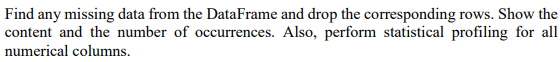

In [ ]:
cleaned_vehicle_mpg = vehicle_mpg.na.drop()

In [ ]:
cleaned_vehicle_mpg.show()

+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|modelyear|origin|             carname|manufacturer|
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+
|18.0|        8|       307.0|     130.0| 3504.|        12.0|       70|     1|chevrolet chevell...|   chevrolet|
|15.0|        8|       350.0|     165.0| 3693.|        11.5|       70|     1|   buick skylark 320|       buick|
|18.0|        8|       318.0|     150.0| 3436.|        11.0|       70|     1|  plymouth satellite|    plymouth|
|16.0|        8|       304.0|     150.0| 3433.|        12.0|       70|     1|       amc rebel sst|         amc|
|17.0|        8|       302.0|     140.0| 3449.|        10.5|       70|     1|         ford torino|        ford|
|15.0|        8|       429.0|     198.0| 4341.|        10.0|       70|     1|    ford galaxie 500|      

In [ ]:
cleaned_vehicle_mpg

DataFrame[mpg: string, cylinders: string, displacement: string, horsepower: string, weight: string, acceleration: string, modelyear: string, origin: string, carname: string, manufacturer: string]

In [ ]:
cleaned_vehicle_mpg = cleaned_vehicle_mpg.withColumn("mpg", cleaned_vehicle_mpg["mpg"].cast(DoubleType()))
cleaned_vehicle_mpg = cleaned_vehicle_mpg.withColumn("cylinders", cleaned_vehicle_mpg["cylinders"].cast(IntegerType()))
cleaned_vehicle_mpg = cleaned_vehicle_mpg.withColumn("displacement", cleaned_vehicle_mpg["displacement"].cast(DoubleType()))
cleaned_vehicle_mpg = cleaned_vehicle_mpg.withColumn("horsepower", cleaned_vehicle_mpg["horsepower"].cast(DoubleType()))
cleaned_vehicle_mpg = cleaned_vehicle_mpg.withColumn("weight", cleaned_vehicle_mpg["weight"].cast(DoubleType()))
cleaned_vehicle_mpg = cleaned_vehicle_mpg.withColumn("acceleration", cleaned_vehicle_mpg["acceleration"].cast(DoubleType()))
cleaned_vehicle_mpg = cleaned_vehicle_mpg.withColumn("modelyear", cleaned_vehicle_mpg["modelyear"].cast(IntegerType()))
cleaned_vehicle_mpg = cleaned_vehicle_mpg.withColumn("origin", cleaned_vehicle_mpg["origin"].cast(IntegerType()))

In [ ]:
print("Data types of each column:")
for col_name, data_type in cleaned_vehicle_mpg.dtypes:
    print(f"{col_name}: {data_type}")

Data types of each column:
mpg: double
cylinders: int
displacement: double
horsepower: double
weight: double
acceleration: double
modelyear: int
origin: int
carname: string
manufacturer: string


In [ ]:
for col_name in cleaned_vehicle_mpg.columns:
    print(f"Occurrences of values in column {col_name}:")
    cleaned_vehicle_mpg.groupBy(col_name).count().show()

Occurrences of values in column mpg:
+----+-----+
| mpg|count|
+----+-----+
|15.5|    5|
|25.1|    1|
|32.3|    1|
|26.4|    1|
|23.8|    1|
|23.9|    2|
|26.6|    2|
|31.6|    1|
|20.5|    3|
|34.7|    1|
|31.5|    2|
|28.8|    1|
|26.8|    1|
|19.9|    1|
|32.7|    1|
|31.9|    1|
|20.2|    4|
|29.0|    8|
|24.5|    2|
|17.7|    1|
+----+-----+
only showing top 20 rows

Occurrences of values in column cylinders:
+---------+-----+
|cylinders|count|
+---------+-----+
|        6|   84|
|        3|    4|
|        5|    3|
|        4|  204|
|        8|  103|
+---------+-----+

Occurrences of values in column displacement:
+------------+-----+
|displacement|count|
+------------+-----+
|       305.0|    4|
|        70.0|    3|
|       168.0|    3|
|       390.0|    1|
|       112.0|    4|
|       232.0|   11|
|       108.0|    5|
|        97.5|    1|
|       181.0|    1|
|        88.0|    1|
|       155.0|    1|
|       350.0|   18|
|       101.0|    1|
|        98.0|   18|
|       116.0|  

In [ ]:
numerical_columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "modelyear", "origin"]

In [ ]:
print("Statistical profiling for numerical columns:")
cleaned_vehicle_mpg.select(numerical_columns).summary().show()

Statistical profiling for numerical columns:
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|               mpg|         cylinders|      displacement|        horsepower|           weight|      acceleration|         modelyear|            origin|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|               398|               398|               398|               392|              398|               398|               398|               398|
|   mean|23.514572864321615| 5.454773869346734|193.42587939698493|104.46938775510205|2970.424623115578|15.568090452261291| 76.01005025125629|1.5728643216080402|
| stddev| 7.815984312565783|1.7010042445332123|104.26983817119587| 38.49115993282846|846.8417741973268| 2.757688929812676|3.6976266467325862|0.8020548

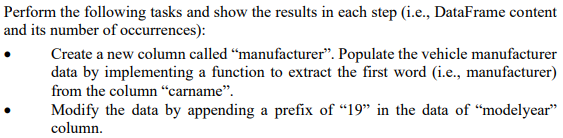

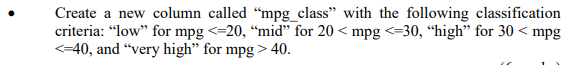

In [ ]:
print("Data types of each column:")
for col_name, data_type in cleaned_vehicle_mpg.dtypes:
    print(f"{col_name}: {data_type}")

Data types of each column:
mpg: double
cylinders: int
displacement: double
horsepower: double
weight: double
acceleration: double
modelyear: int
origin: int
carname: string
manufacturer: string


In [ ]:
populated_cleaned_vehicle_mpg = cleaned_vehicle_mpg.withColumn("manufacturer", split(col("carname"), " ")[0])
populated_cleaned_vehicle_mpg.show()

+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|modelyear|origin|             carname|manufacturer|
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+
|18.0|        8|       307.0|     130.0| 3504.|        12.0|       70|     1|chevrolet chevell...|   chevrolet|
|15.0|        8|       350.0|     165.0| 3693.|        11.5|       70|     1|   buick skylark 320|       buick|
|18.0|        8|       318.0|     150.0| 3436.|        11.0|       70|     1|  plymouth satellite|    plymouth|
|16.0|        8|       304.0|     150.0| 3433.|        12.0|       70|     1|       amc rebel sst|         amc|
|17.0|        8|       302.0|     140.0| 3449.|        10.5|       70|     1|         ford torino|        ford|
|15.0|        8|       429.0|     198.0| 4341.|        10.0|       70|     1|    ford galaxie 500|      

In [ ]:
populated_cleaned_vehicle_mpg.take(1)

[Row(mpg=18.0, cylinders=8, displacement=307.0, horsepower=130.0, weight=3504.0, acceleration=12.0, modelyear=70, origin=1, carname='chevrolet chevelle malibu', manufacturer='chevrolet')]

In [ ]:
print("DataFrame after adding the 'manufacturer' column:")
populated_cleaned_vehicle_mpg.show()

DataFrame after adding the 'manufacturer' column:
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|modelyear|origin|             carname|manufacturer|
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+
|18.0|        8|       307.0|     130.0| 3504.|        12.0|       70|     1|chevrolet chevell...|   chevrolet|
|15.0|        8|       350.0|     165.0| 3693.|        11.5|       70|     1|   buick skylark 320|       buick|
|18.0|        8|       318.0|     150.0| 3436.|        11.0|       70|     1|  plymouth satellite|    plymouth|
|16.0|        8|       304.0|     150.0| 3433.|        12.0|       70|     1|       amc rebel sst|         amc|
|17.0|        8|       302.0|     140.0| 3449.|        10.5|       70|     1|         ford torino|        ford|
|15.0|        8|       429.0|     198.0| 4341.|       

In [ ]:
print("Occurrences of values in the 'manufacturer' column:")
populated_cleaned_vehicle_mpg.groupBy("manufacturer").count().show()

Occurrences of values in the 'manufacturer' column:
+------------+-----+
|manufacturer|count|
+------------+-----+
|       buick|   17|
|     pontiac|   16|
|    mercedes|    1|
|      toyota|   25|
|        saab|    4|
|         amc|   27|
|          vw|    6|
|     peugeot|    8|
|    chrysler|    6|
|    plymouth|   31|
|   vokswagen|    1|
|       chevy|    3|
|        audi|    7|
|      datsun|   23|
|         bmw|    2|
|       dodge|   28|
|        ford|   48|
|     toyouta|    1|
|       capri|    1|
|    cadillac|    2|
+------------+-----+
only showing top 20 rows



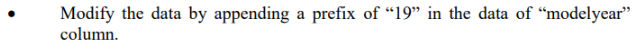

In [ ]:
populated_cleaned_vehicle_mpgs = populated_cleaned_vehicle_mpg.withColumn("modelyear", concat(lit("19"), col("modelyear")))


In [ ]:
print("DataFrame after modifying the 'modelyear' column:")
populated_cleaned_vehicle_mpgs.show()

DataFrame after modifying the 'modelyear' column:
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|modelyear|origin|             carname|manufacturer|
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+
|18.0|        8|       307.0|     130.0| 3504.|        12.0|     1970|     1|chevrolet chevell...|   chevrolet|
|15.0|        8|       350.0|     165.0| 3693.|        11.5|     1970|     1|   buick skylark 320|       buick|
|18.0|        8|       318.0|     150.0| 3436.|        11.0|     1970|     1|  plymouth satellite|    plymouth|
|16.0|        8|       304.0|     150.0| 3433.|        12.0|     1970|     1|       amc rebel sst|         amc|
|17.0|        8|       302.0|     140.0| 3449.|        10.5|     1970|     1|         ford torino|        ford|
|15.0|        8|       429.0|     198.0| 4341.|       

In [ ]:
print("Occurrences of values in the 'modelyear' column:")
populated_cleaned_vehicle_mpgs.groupBy("modelyear").count().show()

Occurrences of values in the 'modelyear' column:
+---------+-----+
|modelyear|count|
+---------+-----+
|     1972|   28|
|     1977|   28|
|     1971|   27|
|     1982|   30|
|     1981|   28|
|     1978|   36|
|     1974|   26|
|     1976|   34|
|     1973|   40|
|     1980|   27|
|     1979|   29|
|     1975|   30|
|     1970|   29|
+---------+-----+



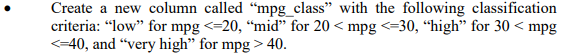

In [ ]:
new_populated_cleaned_vehicle_mpg = populated_cleaned_vehicle_mpgs.withColumn("mpg_class",
                   when(col("mpg") <= 20, "low")
                   .when((col("mpg") > 20) & (col("mpg") <= 30), "mid")
                   .when((col("mpg") > 30) & (col("mpg") <= 40), "high")
                   .when(col("mpg") > 40, "very high")
                   .otherwise("unknown"))


In [ ]:
print("DataFrame after adding the 'mpg_class' column:")
new_populated_cleaned_vehicle_mpg.show()

DataFrame after adding the 'mpg_class' column:
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+---------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|modelyear|origin|             carname|manufacturer|mpg_class|
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+---------+
|18.0|        8|       307.0|     130.0|3504.0|        12.0|     1970|     1|chevrolet chevell...|   chevrolet|      low|
|15.0|        8|       350.0|     165.0|3693.0|        11.5|     1970|     1|   buick skylark 320|       buick|      low|
|18.0|        8|       318.0|     150.0|3436.0|        11.0|     1970|     1|  plymouth satellite|    plymouth|      low|
|16.0|        8|       304.0|     150.0|3433.0|        12.0|     1970|     1|       amc rebel sst|         amc|      low|
|17.0|        8|       302.0|     140.0|3449.0|        10.5|     1970|     1|         ford torino| 

In [ ]:
print("Occurrences of values in the 'mpg_class' column:")
new_populated_cleaned_vehicle_mpg.groupBy("mpg_class").count().show()

Occurrences of values in the 'mpg_class' column:
+---------+-----+
|mpg_class|count|
+---------+-----+
|      low|  160|
|      mid|  149|
|     high|   75|
|very high|    8|
+---------+-----+



In [ ]:
vehicle_manufacturers = spark.read.option("header", "true").csv("vehicle_manufacturers.csv")


In [ ]:
vehicle_manufacturers.show()

+-------------+-------+
| manufacturer|country|
+-------------+-------+
|          amc|     us|
|         audi|germany|
|          bmw|germany|
|        buick|     us|
|     cadillac|     us|
|        capri|     us|
|    chevroelt|     us|
|    chevrolet|     us|
|        chevy|     us|
|     chrysler|     us|
|       datsun|  japan|
|        dodge|     us|
|         fiat|  italy|
|         ford|     us|
|           hi|     us|
|        honda|  japan|
|        maxda|  japan|
|        mazda|  japan|
|     mercedes|germany|
|mercedes-benz|germany|
+-------------+-------+
only showing top 20 rows



In [ ]:
combined_df = new_populated_cleaned_vehicle_mpg.join(vehicle_manufacturers, new_populated_cleaned_vehicle_mpg["manufacturer"] == vehicle_manufacturers["manufacturer"], "inner")


In [ ]:
print("DataFrame after joining dataframes:")
combined_df.show()

DataFrame after joining dataframes:
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+---------+------------+-------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|modelyear|origin|             carname|manufacturer|mpg_class|manufacturer|country|
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+---------+------------+-------+
|18.0|        8|       307.0|     130.0|3504.0|        12.0|     1970|     1|chevrolet chevell...|   chevrolet|      low|   chevrolet|     us|
|15.0|        8|       350.0|     165.0|3693.0|        11.5|     1970|     1|   buick skylark 320|       buick|      low|       buick|     us|
|18.0|        8|       318.0|     150.0|3436.0|        11.0|     1970|     1|  plymouth satellite|    plymouth|      low|    plymouth|     us|
|16.0|        8|       304.0|     150.0|3433.0|        12.0|     1970|     1|       amc rebel sst|        

In [ ]:
cleaned_combined_df = combined_df.drop(vehicle_manufacturers["manufacturer"])

In [ ]:
print("DataFrame after joining dataframes:")
cleaned_combined_df.show()

DataFrame after joining dataframes:
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+---------+-------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|modelyear|origin|             carname|manufacturer|mpg_class|country|
+----+---------+------------+----------+------+------------+---------+------+--------------------+------------+---------+-------+
|18.0|        8|       307.0|     130.0|3504.0|        12.0|     1970|     1|chevrolet chevell...|   chevrolet|      low|     us|
|15.0|        8|       350.0|     165.0|3693.0|        11.5|     1970|     1|   buick skylark 320|       buick|      low|     us|
|18.0|        8|       318.0|     150.0|3436.0|        11.0|     1970|     1|  plymouth satellite|    plymouth|      low|     us|
|16.0|        8|       304.0|     150.0|3433.0|        12.0|     1970|     1|       amc rebel sst|         amc|      low|     us|
|17.0|        8|       302.0|     140.0|3449.0|       

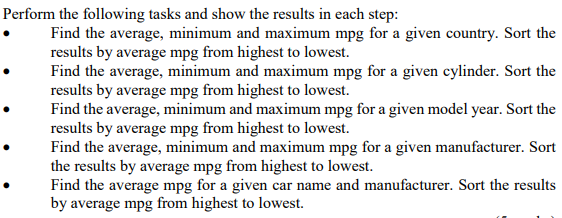

In [ ]:
all_country_stats = cleaned_combined_df.groupBy("country").agg(
    round(avg("mpg"), 2).alias("avg_mpg"),
    min("mpg").alias("min_mpg"),
    max("mpg").alias("max_mpg")
).sort(desc("avg_mpg"))

print("Average, Minimum, and Maximum MPG for every country")
all_country_stats.show()

Average, Minimum, and Maximum MPG for every country
+-------+-------+-------+-------+
|country|avg_mpg|min_mpg|max_mpg|
+-------+-------+-------+-------+
|     uk|   35.0|   35.0|   35.0|
|  japan|  30.45|   18.0|   46.6|
|germany|  29.21|   16.5|   44.3|
|  italy|  28.91|   24.0|   37.3|
| france|  25.32|   16.2|   36.0|
| sweden|  22.23|   17.0|   30.7|
|     us|  20.03|    9.0|   39.0|
+-------+-------+-------+-------+



In [ ]:
all_cylinder_stats = cleaned_combined_df.groupBy("cylinders").agg(
    round(avg("mpg"), 2).alias("avg_mpg"),
    min("mpg").alias("min_mpg"),
    max("mpg").alias("max_mpg")
).sort(desc("avg_mpg"))

print("Average, Minimum, and Maximum MPG for every cylinder")
all_cylinder_stats.show()

Average, Minimum, and Maximum MPG for every cylinder
+---------+-------+-------+-------+
|cylinders|avg_mpg|min_mpg|max_mpg|
+---------+-------+-------+-------+
|        4|  29.28|   18.0|   46.6|
|        5|  27.37|   20.3|   36.4|
|        3|  20.55|   18.0|   23.7|
|        6|  19.97|   15.0|   38.0|
|        8|  14.96|    9.0|   26.6|
+---------+-------+-------+-------+



In [ ]:
all_model_year_stats = cleaned_combined_df.groupBy("modelyear").agg(
    round(avg("mpg"), 2).alias("avg_mpg"),
    min("mpg").alias("min_mpg"),
    max("mpg").alias("max_mpg")
).sort(desc("avg_mpg"))

print("Average, Minimum, and Maximum MPG for every model year")
all_model_year_stats.show()

Average, Minimum, and Maximum MPG for every model year
+---------+-------+-------+-------+
|modelyear|avg_mpg|min_mpg|max_mpg|
+---------+-------+-------+-------+
|     1980|   33.8|   19.1|   46.6|
|     1982|   32.0|   22.0|   44.0|
|     1981|  30.19|   17.6|   39.1|
|     1979|  25.09|   15.5|   37.3|
|     1978|  24.06|   16.2|   43.1|
|     1977|  23.38|   15.0|   36.0|
|     1974|  22.77|   13.0|   32.0|
|     1976|  21.57|   13.0|   33.0|
|     1971|  21.11|   12.0|   35.0|
|     1975|  20.27|   13.0|   33.0|
|     1972|  18.71|   11.0|   28.0|
|     1970|  17.69|    9.0|   27.0|
|     1973|   17.1|   11.0|   29.0|
+---------+-------+-------+-------+



In [ ]:
cleaned_combined_df

DataFrame[mpg: double, cylinders: int, displacement: double, horsepower: double, weight: double, acceleration: double, modelyear: string, origin: int, carname: string, manufacturer: string, mpg_class: string, country: string]

In [ ]:
all_manufacturer_stats = cleaned_combined_df.groupBy("manufacturer").agg(
    round(avg("mpg"), 2).alias("avg_mpg"),
    min("mpg").alias("min_mpg"),
    max("mpg").alias("max_mpg")
).sort(desc("avg_mpg"))

print("Average, Minimum, and Maximum MPG for every manufacturer")
all_manufacturer_stats.show()

Average, Minimum, and Maximum MPG for every manufacturer
+------------+-------+-------+-------+
|manufacturer|avg_mpg|min_mpg|max_mpg|
+------------+-------+-------+-------+
|          vw|  39.02|   29.0|   44.3|
|      nissan|   36.0|   36.0|   36.0|
|     triumph|   35.0|   35.0|   35.0|
|       honda|  33.76|   24.0|   44.6|
|      datsun|  31.11|   22.0|   40.8|
|       mazda|  30.86|   19.0|   46.6|
|      subaru|  30.53|   26.0|   33.8|
|   vokswagen|   29.8|   29.8|   29.8|
|     renault|  29.67|   26.0|   36.0|
|  volkswagen|  29.11|   22.0|   43.1|
|        fiat|  28.91|   24.0|   37.3|
|      toyota|  28.37|   19.0|   39.1|
|        audi|  26.71|   20.0|   36.4|
|       maxda|  26.05|   18.0|   34.1|
|        opel|  25.75|   24.0|   28.0|
|    mercedes|   25.4|   25.4|   25.4|
|       capri|   25.0|   25.0|   25.0|
|        saab|   23.9|   21.6|   25.0|
|         bmw|  23.75|   21.5|   26.0|
|     peugeot|  23.69|   16.2|   30.0|
+------------+-------+-------+-------+
only sh

In [ ]:
all_carname_manufacturer_stats = cleaned_combined_df.groupBy("carname", "manufacturer").agg(
    round(avg("mpg"), 2).alias("avg_mpg"),
).sort(desc("avg_mpg"))

print("Average, Minimum, and Maximum MPG for every carname and manufacturer")
all_carname_manufacturer_stats.show()

Average, Minimum, and Maximum MPG for every carname and manufacturer
+--------------------+------------+-------+
|             carname|manufacturer|avg_mpg|
+--------------------+------------+-------+
|           mazda glc|       mazda|   46.6|
| honda civic 1500 gl|       honda|   44.6|
|vw rabbit c (diesel)|          vw|   44.3|
|           vw pickup|          vw|   44.0|
|  vw dasher (diesel)|          vw|   43.4|
|volkswagen rabbit...|  volkswagen|   43.1|
|      datsun b210 gx|      datsun|   39.4|
|      toyota starlet|      toyota|   39.1|
|      plymouth champ|    plymouth|   39.0|
|toyota corolla te...|      toyota|   38.1|
|plymouth horizon ...|    plymouth|   38.0|
|       datsun 310 gx|      datsun|   38.0|
|oldsmobile cutlas...|  oldsmobile|   38.0|
|       toyota tercel|      toyota|   37.7|
|  fiat strada custom|        fiat|   37.3|
|          datsun 310|      datsun|   37.2|
|  mazda glc custom l|       mazda|   37.0|
|      datsun 210 mpg|      datsun|   37.0|
|datsun

In [ ]:
cleaned_combined_df.createOrReplaceTempView("combined_data")


In [ ]:
country_stats_sql = spark.sql("""
    SELECT country, ROUND(AVG(mpg), 2) AS avg_mpg, MIN(mpg) AS min_mpg, MAX(mpg) AS max_mpg
    FROM combined_data
    GROUP BY country
    ORDER BY AVG(mpg) DESC
    LIMIT 20
""")
country_stats_sql.show()

+-------+-------+-------+-------+
|country|avg_mpg|min_mpg|max_mpg|
+-------+-------+-------+-------+
|     uk|   35.0|   35.0|   35.0|
|  japan|  30.45|   18.0|   46.6|
|germany|  29.21|   16.5|   44.3|
|  italy|  28.91|   24.0|   37.3|
| france|  25.32|   16.2|   36.0|
| sweden|  22.23|   17.0|   30.7|
|     us|  20.03|    9.0|   39.0|
+-------+-------+-------+-------+



In [ ]:
cylinder_stats_sql = spark.sql("""
    SELECT cylinders, ROUND(AVG(mpg), 2) AS avg_mpg, MIN(mpg) AS min_mpg, MAX(mpg) AS max_mpg
    FROM combined_data
    GROUP BY cylinders
    ORDER BY AVG(mpg) DESC
    LIMIT 20
""")
cylinder_stats_sql.show()

+---------+-------+-------+-------+
|cylinders|avg_mpg|min_mpg|max_mpg|
+---------+-------+-------+-------+
|        4|  29.28|   18.0|   46.6|
|        5|  27.37|   20.3|   36.4|
|        3|  20.55|   18.0|   23.7|
|        6|  19.97|   15.0|   38.0|
|        8|  14.96|    9.0|   26.6|
+---------+-------+-------+-------+



In [ ]:
model_year_stats_sql = spark.sql("""
    SELECT modelyear, ROUND(AVG(mpg), 2) AS avg_mpg, MIN(mpg) AS min_mpg, MAX(mpg) AS max_mpg
    FROM combined_data
    GROUP BY modelyear
    ORDER BY AVG(mpg) DESC
    LIMIT 20
""")
model_year_stats_sql.show()

+---------+-------+-------+-------+
|modelyear|avg_mpg|min_mpg|max_mpg|
+---------+-------+-------+-------+
|     1980|   33.8|   19.1|   46.6|
|     1982|   32.0|   22.0|   44.0|
|     1981|  30.19|   17.6|   39.1|
|     1979|  25.09|   15.5|   37.3|
|     1978|  24.06|   16.2|   43.1|
|     1977|  23.38|   15.0|   36.0|
|     1974|  22.77|   13.0|   32.0|
|     1976|  21.57|   13.0|   33.0|
|     1971|  21.11|   12.0|   35.0|
|     1975|  20.27|   13.0|   33.0|
|     1972|  18.71|   11.0|   28.0|
|     1970|  17.69|    9.0|   27.0|
|     1973|   17.1|   11.0|   29.0|
+---------+-------+-------+-------+



In [ ]:
manufacturer_stats_sql = spark.sql("""
    SELECT manufacturer, ROUND(AVG(mpg), 2) AS avg_mpg, MIN(mpg) AS min_mpg, MAX(mpg) AS max_mpg
    FROM combined_data
    GROUP BY manufacturer
    ORDER BY AVG(mpg) DESC
    LIMIT 20
""")
manufacturer_stats_sql.show()

+------------+-------+-------+-------+
|manufacturer|avg_mpg|min_mpg|max_mpg|
+------------+-------+-------+-------+
|          vw|  39.02|   29.0|   44.3|
|      nissan|   36.0|   36.0|   36.0|
|     triumph|   35.0|   35.0|   35.0|
|       honda|  33.76|   24.0|   44.6|
|      datsun|  31.11|   22.0|   40.8|
|       mazda|  30.86|   19.0|   46.6|
|      subaru|  30.53|   26.0|   33.8|
|   vokswagen|   29.8|   29.8|   29.8|
|     renault|  29.67|   26.0|   36.0|
|  volkswagen|  29.11|   22.0|   43.1|
|        fiat|  28.91|   24.0|   37.3|
|      toyota|  28.37|   19.0|   39.1|
|        audi|  26.71|   20.0|   36.4|
|       maxda|  26.05|   18.0|   34.1|
|        opel|  25.75|   24.0|   28.0|
|    mercedes|   25.4|   25.4|   25.4|
|       capri|   25.0|   25.0|   25.0|
|        saab|   23.9|   21.6|   25.0|
|         bmw|  23.75|   21.5|   26.0|
|     peugeot|  23.69|   16.2|   30.0|
+------------+-------+-------+-------+



In [ ]:
carname_manufacturer_sql = spark.sql("""
    SELECT carname, manufacturer, ROUND(AVG(mpg), 2) AS avg_mpg
    FROM combined_data
    GROUP BY carname, manufacturer
    ORDER BY AVG(mpg) DESC
    LIMIT 20
""")
carname_manufacturer_sql.show()

+--------------------+------------+-------+
|             carname|manufacturer|avg_mpg|
+--------------------+------------+-------+
|           mazda glc|       mazda|   46.6|
| honda civic 1500 gl|       honda|   44.6|
|vw rabbit c (diesel)|          vw|   44.3|
|           vw pickup|          vw|   44.0|
|  vw dasher (diesel)|          vw|   43.4|
|volkswagen rabbit...|  volkswagen|   43.1|
|      datsun b210 gx|      datsun|   39.4|
|      toyota starlet|      toyota|   39.1|
|      plymouth champ|    plymouth|   39.0|
|toyota corolla te...|      toyota|   38.1|
|       datsun 310 gx|      datsun|   38.0|
|plymouth horizon ...|    plymouth|   38.0|
|oldsmobile cutlas...|  oldsmobile|   38.0|
|       toyota tercel|      toyota|   37.7|
|  fiat strada custom|        fiat|   37.3|
|          datsun 310|      datsun|   37.2|
|  mazda glc custom l|       mazda|   37.0|
|      datsun 210 mpg|      datsun|   37.0|
|datsun 510 hatchback|      datsun|   37.0|
| audi 5000s (diesel)|        au